<a href="https://colab.research.google.com/github/Itiel-z/Intro-to-AI-colab/blob/main/Assignment%208%20Intro%202%20AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 8 - Itiel

In [59]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)

# --- Data Collection and Loading ---

In [33]:
# Load the data
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/student-mat.csv"
df = pd.read_csv(url, sep=',')


# --- Quick Check of Data ---

In [34]:
# Display the first few rows of the dataset to understand its structure.
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [35]:
# Check the features and target variable. Identify which is continuous and categorical if applicable
print(f'Below if the basic information about the structure of the dataset:\n')
df.info()
print(f'Below is the summary statistics of the dataset:\n')
df.describe()

Below if the basic information about the structure of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-nu

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [36]:
# convert the target into binary ie. scores less than or equal to 10 pass(1) and else fail(0)
def convert_grade_to_pass(g3_score):
    if g3_score >= 10:
        return 1
    else:
        return 0

df['pass'] = df['G3'].apply(convert_grade_to_pass)

print("\n🎯 Class distribution:\n", df['pass'].value_counts())



🎯 Class distribution:
 pass
1    265
0    130
Name: count, dtype: int64


The dataset is somewhat balance with a ration of 67:33 in favour of the passing class ie 1

In [41]:
# Since we now have a binary target column, we can safely drop the G1, G2 and G3 columns
df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

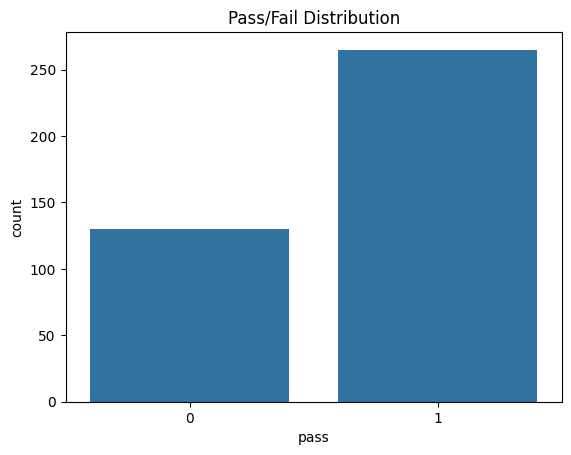

In [42]:
# Step 4: Visualize target
sns.countplot(x='pass', data=df)
plt.title("Pass/Fail Distribution")
plt.show()

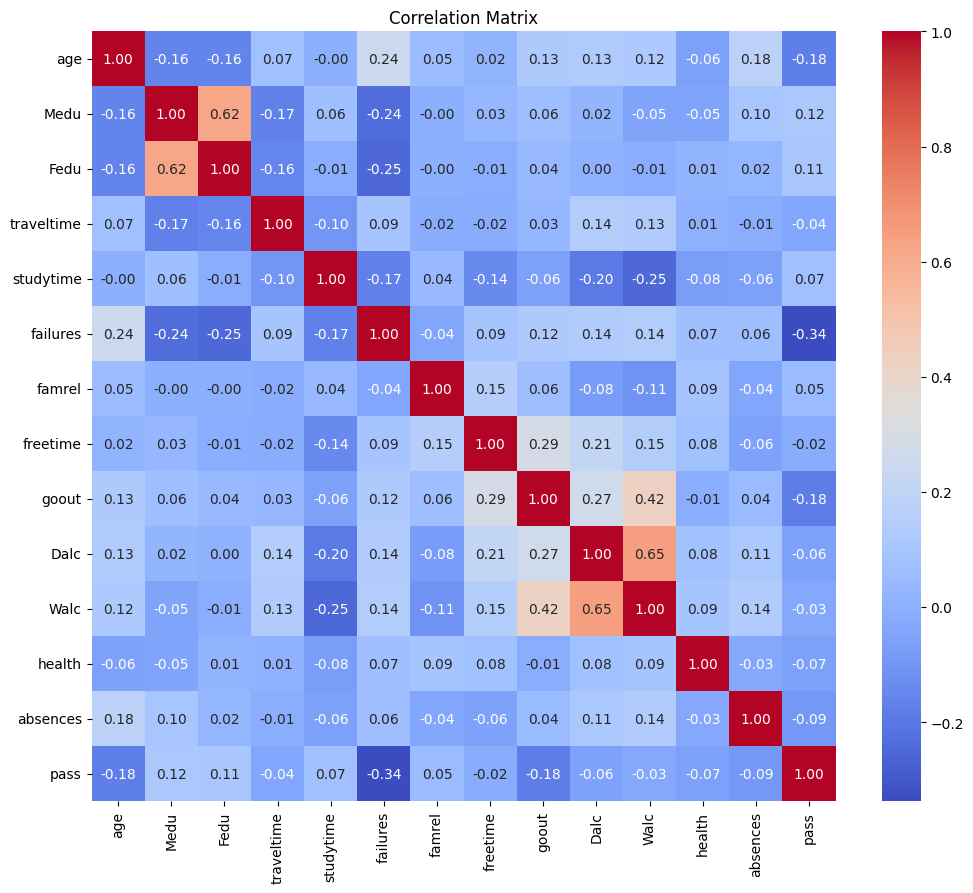

In [44]:
# correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

On their own, the numeric features do not seem to have much bearing on whether the students pass or fail

# -------Data preprocessing---------

In [47]:
# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,False,True,False,True,True,False,True,True,False,False
391,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,...,False,True,False,False,False,False,False,True,False,False
393,18,3,2,3,1,0,4,4,1,3,...,True,False,False,False,False,False,False,True,True,False


In [48]:
# Split into features and target
X = df_encoded.drop(columns='pass')
y = df_encoded['pass']

In [49]:
# Apply scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---Logistics Regression------

Applying logistics regression because it is more suitable for binary targets

In [51]:
# Train the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [69]:
# Model evaluation
y_pred_log = log_model.predict(X_test)

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred_log, target_names=["Fail", "Pass"]))


 Classification Report:

              precision    recall  f1-score   support

        Fail       0.61      0.41      0.49        27
        Pass       0.74      0.87      0.80        52

    accuracy                           0.71        79
   macro avg       0.67      0.64      0.64        79
weighted avg       0.69      0.71      0.69        79



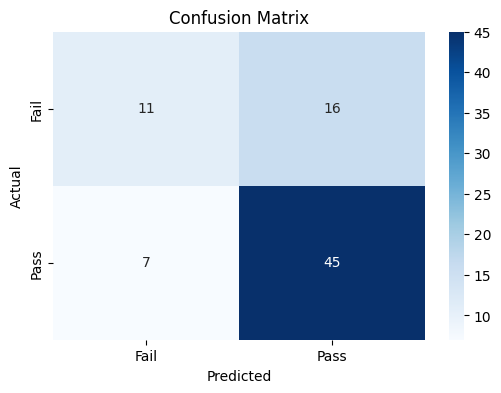

In [61]:
# Confusion matrix
y_true = y_test
cm = confusion_matrix(y_true, y_pred_log)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ----Random Forest Classifier----

In [53]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Model evaluation
y_pred_rf = rf_model.predict(X_test)

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=["Fail", "Pass"]))


 Classification Report:

              precision    recall  f1-score   support

        Fail       0.50      0.19      0.27        27
        Pass       0.68      0.90      0.78        52

    accuracy                           0.66        79
   macro avg       0.59      0.54      0.52        79
weighted avg       0.62      0.66      0.60        79



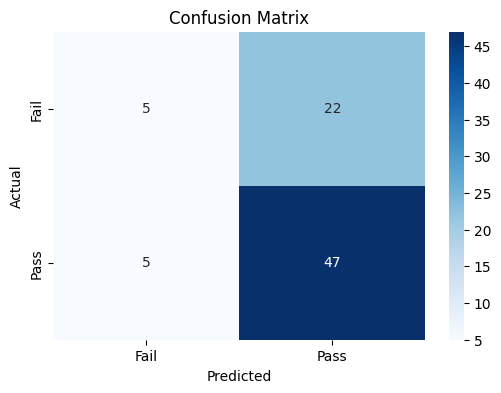

In [71]:
# Confusion matrix
y_true = y_test
cm = confusion_matrix(y_true, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# -----------Interpretation and Inference----------


Logistic Regression outperforms the Random Forest classifier on this dataset, especially in balancing recall and precision. Although Random Forest has slightly better recall for the "Pass" class, it performs poorly on "Fail" predictions with a precision of 0.50 and a recall 0.19 thereby failing to balance the metrics.

When considering class wise metrics, the Logistic Regression has more balanced metrics, making it more reliable in this binary classification task.

# ----------Deployment and Monitoring----------

* Deployment:
Package the logistic regression model using pickle, wrarp it in an API to expose an user input endpoint and deploy it to a cloud based platform for accessability.

* Potential Deployment Issues:
These include data drifting which occurs where the relationship between features and labels may change over time, latency and throughput issues ie there is the need to ensure that the model responds in real-time and the issue of unbalanced data in the production environment that might not match the class distribution of the data used to train the model.

* Monitoring & Maintenance:
There is need to moniotor model performance regularly and retrain the model periodically using recent data to ensure relavence and to monitor input data to ensure conformance to the data schema and timeously detect data drifting